<a href="https://colab.research.google.com/github/TheHarrySun/CBE512-MLinChmSciEng/blob/main/assignments/CBE512_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name**: Harrison Xu
## **Status**: UG2
## **Department**: CBE

# ***CBE 512. Machine Learning in Chemical Science and Engineering.***
## **Assignment 02:** *Preliminaries, Regression+Classification*
### &#169; Princeton University
### **DUE**: 11:59pm, October 02, 2024
### **Notes**: Supply responses/solutions in a packaged format, including notebook (.ipynb) and any supporting files required to run the notebook. Your assignment should be submitted to Canvas.



---
## **Problem 1, Concept check (25 points):**

**(a)** *In about a paragraph*, describe the fundamental distinction between supervised vs. unsupervised learning and classification vs. regression. For each case, try to identify/explain a setting (in physical science/engineering) for which these modes of machine learning may be appropriate.

---


***Student Response:***

**The primary difference between supervised and unsupervised learning is the type of data that is being used. In supervised learning, we use labeled data and attempt to create a model that predicts y as a function of x. In contrast, unsupervised learning uses unlabeled data, and instead just looks at the values of x data and try to find patterns within x. An example of supervised learning is determining the enantioselectivity of a reaction based on chemical parameters. This is a project I am working on in a lab, where I took electronic and structural parameters such as electronegativity and the size of different substrates and used that data to create a model that attempts to predict the enantioselectivity of the resulting reaction. An example of unsupervised learning is if you have a bunch of molecules and you graph the molecules on a graph based on two parameters of the molecules, then you can use clustering to try and determine which molecules are most similar.**

**The main distinction between classification and regression is the type of label used. Both classification and regression are forms of supervised learning, but classification uses categorical labels whereas regression uses a continuous label. For example, regression would attempt to determine a number such as a slope that would fit data regarding two parameters of a molecule and determining if there is sufficient correlation, whereas classification would be determining whether a molecule is reactive or unreactive.**

**(b)** In class, we have often noted when a problem might be solved exactly using techniques from linear algebra (using matrix inversion and minimizing projection error). Remark on the scope/applicability of this approach (i.e., for what class of models and errors is it useful). Use this explanation to expand on the utility of machine learning. *Hint*: your reponse should touch on model complexity and the nature of loss functions.

---

***Student Response:***

**Using linear algebra techniques such as matrix inversion and minimizing projection error is limited to purely linear situations. When using more complex models such as classification models that use sigmoids, finding something like a matrix inversion matrix becomes much more complex. This is because the loss functions of these more complex activation functions is nonlinear, which means using linear methods leads to an ineffective model. This also means that working with nonlinear data makes using linear algebra techniques very difficult. Additionally, when there is very high amounts of data, calculating the matrix inverse ends up being very computationally expensive and time-consuming.**

**This means that the utility of machine learning expands outside linear algebra techniques to more complex models like neural networks that can react to nonlinear data and create nonlinear decision boundaries.**

**(c)** Explain the utility of feature scaling (in general). Pick one feature-scaling method available in scikit-learn. Describe its approach/implementation and discuss any advantages/limitations.

---

***Student Response:***

**The primary utility of feature scaling is to adjust the data to a certain shape in order to improve data analysis. We can use linear scaling methods to change the range and mean of the data in order to make analyzing data easier, so that, instead of looking at data from a range of 0 to 4000 (for example), we are looking at data from a range of 0 to 4. Additionally, it helps ensure that all features are treated the same. For example, if one feature ranges to 4000 whereas one feature ranges to 4, then the model will naturally emphasize the one that goes to 4000. Thus, scaling all the features ensure that all the features are treated with the same weight.**

**One feature scaling method available in scikit-learn is the non-linear scaling method of mapping to a Gaussian distribution, using the function PowerTransformer. The way you use this class is by inputting a method (either Yeo-Johnson or Box-Cox), clarifying whether or not you want to standardize (setting to true would mean apply zero-mean and unit variance), and defining whether or not you want to alter the original dataframe or if you want to create a copy. Then you use a function called fit_transform to transform your data. It would look like this:**

In [ ]:
from sklearn import preprocessing
import numpy as np

pt = preprocessing.PowerTransformer(method="yeo-johnson", standardize=True, copy=True)
data = np.array([[1,2],[3,2],[4,5]])

print(pt.fit_transform(data))

[[-1.31616039 -0.70710678]
 [ 0.20998268 -0.70710678]
 [ 1.1061777   1.41421356]]


**The main advantage of this method for feature scaling is that it turns the data more Gaussian-like, which is useful whenever dealing with issues due to non-constant variance. It is also useful whenever a situation requiring normality is desired. However, the disadvantages of this method would be that it completely changes the shape of the data, so we lose some information encoded in the data due to this method of feature scaling.**

**(d)** In class, we discussed some of the dangers of simple gradient descent as a method for parameter optimization. Explain how methods like "gradient descent with momentum" or "stochastic" gradient descent might be superior by contrast.

---

***Student Response:***

**Some primary disadvantages to gradient descent are that it converges very slow whenever reaching a flat portion of the loss curve and that it can get stuck in local minima, resulting in an unoptimized model.**

**Gradient descent with momentum is useful to address these issues because it uses memory of previous movement to describe the current movements. As a result, if the gradient descent falls down a steep loss curve and then reaches a flat part, then the gradient descent wouldn't slow down drastically because the "momentum" from the steep fall helps push the gradient descent past this flat part. Similarly, if the gradient descent falls into a local minimum, it may have enough momentum to push itself out of the local minimum, allowing for the gradient descent to avoid local minima and reach the global minimum.**

**Stochastic gradient descent is slightly different in that it performs gradient descent on random batches of the data set, instead of using the entire data set at once. The benefit of this is that the loss curve ends up being very bumpy, meaning that flat parts of the loss curve end up not being as slow as vanilla gradient descent. Furthermore, the random movements of the stochastic gradient descent allows for it to escape local minima.**

**(e)** In the vernacular of class, what is the distinction between "parameters" and "hyperparameters." For the case of support vector machines and random forest models, identify and explain some of the more evident hyperparameters.

---

***Student Response:***

**Parameters are values that are necessary for the machine learning model to create a prediction, and these parameters are adjusted in the learning process of the model. Hyperparameter, in contrast, are not necessary for the machine learning model to create a prediction, and instead are adjusted in order to expedite the learning process.**

**In the case of support vector machines, some hyperparamters are the regularization terms when used in soft-margin SVMs. Another example of a hyperparameter is when using nonlinear SVMs, where the number of dimensions that the data is being mapped onto and the kernel functions are other hyperparameters.**

**For random forest models, some examples of hyperparameters are things like the number of trees, the maximum depth of a tree, and the minimum number of samples per leaf node. The specification of these hyperparameters ensure that overfitting and underfitting doesn't happen.**



---


## **Problem 2, Rest and Regression (40 points):**

Examine the contents of `solubility_regression.csv`.
You can download and view it on your own or easily examine the contents on [github](https://github.com/webbtheosim/CBE512-MLinChmSciEng/blob/main/data/solubility-regression-cbe512.csv).

This is an expanded version of the solubility dataset used in the first problem set. Notably, whereas previously the `.csv` had columns for just `SMILES`, `Solubility`, and `MolWt`, now there are many more columns that can be used as inputs in our feature vectors.

Overall, we are going to explore aspects of model-building with the example of multivariate linear regression. For this problem part, your *label* that we want to predict will be `Solubility`

---



**(a)** Begin by partitioning the data into a simple 80/20 train/test split.
You may either use your own function to do this train-test split, or you may use a function from scikit-learn (e.g., `sklearn.model_selection.train_test_split`).
Pick two features in the dataset and compare the distribution of those features with each other and how those features compare between the proposed training and test set.
What considerations might one have with respect to these distributions in developing subsequent machine learning models?

---

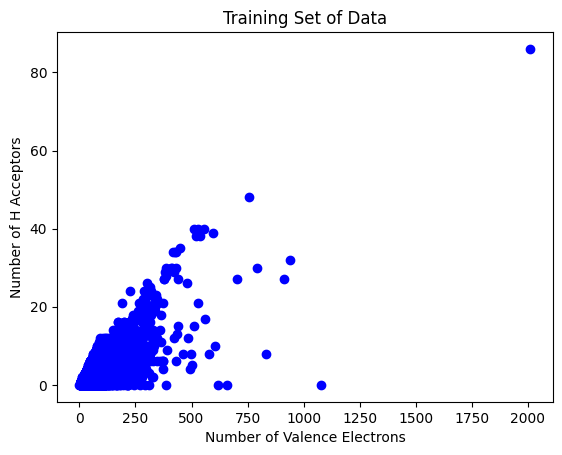

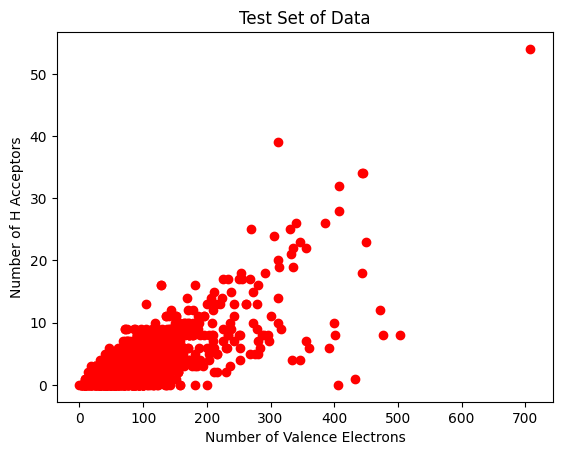

In [ ]:
# import modules for this problem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read the file and put all of the data into a pandas dataframe
url = "https://raw.githubusercontent.com/webbtheosim/CBE512-MLinChmSciEng/refs/heads/main/data/solubility-regression-cbe512.csv"
data = pd.read_csv(url)

# define method that splits data into a training set and a test set
def data_split(data, labels, train = 0.8, shuffle = True):
  new_data = np.array(data)
  new_labels = np.array(labels)
  if (shuffle):
    p = np.random.RandomState(1).permutation(len(new_data))
    new_data = new_data[p]
    new_labels = new_labels[p]

  index = int(len(new_data) * train)

  training_set = new_data[:index]
  test_set = new_data[index:]
  training_labels = new_labels[:index]
  test_labels = new_labels[index:]
  return training_set, test_set, training_labels, test_labels

# create the valence electrons train and test sets
valence_electrons = np.array(data['NumValenceElectrons'])
#val_train, val_test = data_split(valence_electrons, train=0.8, shuffle=False)

# create the hacceptor train and test sets
hacceptors = np.array(data['NumHAcceptors'])

train1, test1, train2, test2 = data_split(valence_electrons, hacceptors, train = 0.8, shuffle=True)


# plot the hacceptor training set vs the val electrons training set
plt.scatter(train1, train2, marker='o', color='b')
plt.xlabel('Number of Valence Electrons')
plt.ylabel('Number of H Acceptors')
plt.title('Training Set of Data')
plt.show()

# plot the hacceptor test set vs the val electrons test set
plt.scatter(test1, test2, marker='o', color='r')
plt.xlabel('Number of Valence Electrons')
plt.ylabel('Number of H Acceptors')
plt.title('Test Set of Data')
plt.show()


**Looking at the two distributions, it generally looks like the data from the training set tends to have a larger range of number of valence electrons and number of H acceptors compared to the test data. Thus, one should probably keep in mind, when training a model and then testing it, the test data will likely not be able to cover as broad of a range as the training data. As a result, the test data may not be able to represent the total population optimally. Conversely, sometimes the test data has an outlier that is farther out than any of the training data, which would cause an issue because the model would not be trained much on pieces of data in the training set, hurting the model's accuracy.**

**(b)** Now create and train a multivariate [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) model that takes available *numerical* features as input and predicts solubility. You may choose to implement feature-scaling in anyway you like (if at all).
How well does the model fit the data it was trained on? How well does it generalize to the test set?

---





In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# collect all of the numerical features as input
num_data = []
for i in range(0, len(np.array(data).T)):
  if (isinstance(np.array(data).T[i][0], int) or isinstance(np.array(data).T[i][0], float) and i != len(np.array(data).T) - 1):
    num_data.append(np.array(data).T[i])

# store the data in a np.array num_data, with each row being one data point
# and each column being one feature
num_data = np.array(num_data).T

# standard scaler creation
scaler = StandardScaler()

# define the labels
labels = np.array(data['Solubility'])
labels = labels.reshape(-1, 1)

# split the data into train and test sets
X_train, X_test, Y_train, Y_test = data_split(num_data, labels)

# scale the training and the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# scale the labels
Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.transform(Y_test)

# create a method to evaluate how well the parameters perform
def evaluate(x, y, theta):
  y_hat = np.matmul(x, theta)
  r2 = r2_score(y, y_hat)
  mse = mean_squared_error(y, y_hat)
  mae = mean_absolute_error(y, y_hat)
  return "Performance\nr2 = {:>5.3f}, MSE = {:>5.3f}, MAE = {:>5.3f}\n".format(r2,mse,mae)


# LINEAR ALGEBRA OPTIMIZATION
# using linear algebra to calculate the Moore-Penrose inverse
AtAinv = np.linalg.inv(np.matmul(X_train.T, X_train))

# calculating the weights theta
theta = np.matmul(AtAinv, np.matmul(X_train.T, Y_train))

# calculating the performance for training and test sets with linear algebra method
print("Linear Algebra Method")
print("Training set: " + evaluate(X_train, Y_train, theta))
print("Test set: " + evaluate(X_test, Y_test, theta))


# TRY GRADIENT DESCENT OPTIMIZATION
# define a loss function
def loss(x, y, theta):
  return np.sum((np.matmul(x, theta) - y)**2) / len(y)

# define a gradient descent function
def gradient_descent(x, y, theta, lr, iters):
  for i in range(iters):
    gradient = 2 * np.matmul(x.T,(np.matmul(x, theta) - y)) / len(y)
    theta -= gradient * lr
  return theta

# create a theta array and then optimize it
theta_grad = np.ones((X_train.shape[1],1))
theta_grad = gradient_descent(X_train, Y_train, theta_grad, lr = 0.01, iters = 1000)

# calculating the performance for training and test sets with gradient descent method
print("Gradient Descent Method")
print("Training set: " + evaluate(X_train, Y_train, theta_grad))
print("Test set: " + evaluate(X_test, Y_test, theta_grad))

Linear Algebra Method
Training set: Performance
r2 = 0.513, MSE = 0.487, MAE = 0.519

Test set: Performance
r2 = 0.499, MSE = 0.496, MAE = 0.521

Gradient Descent Method
Training set: Performance
r2 = 0.486, MSE = 0.514, MAE = 0.532

Test set: Performance
r2 = 0.503, MSE = 0.491, MAE = 0.529



**In my code, I implemented two methods for developing the model. I used a purely linear algebra heavy method where I calculated the Moore-Penrose inverse to determine the optimized model parameters. I also implemented a gradient descent algorithm that optimized model parameters using gradient descent. Both methods performed poorly on the training and test sets, with the linear algebra method performing slightly better. In using gradient descent, the model was able to generalize more effectively than it was to model the data in the training set.**

**(c)** Some of the features might not be useful, adding unnecessary noise and complexity to the model.
In this part, you will select a "minimal" set of features that still results in a quality linear model by using cross-validation and information criteria.

While we *could* evaluate the space of combinations exhaustively (code will take appx. 1.5 hrs to run) we will instead use a greedy, stepwise algorithm to build up a feature list.
Starting with the null model (no features, optimal model would just predict the mean for every input), compare models that augment the existing model with one of the features from the remaining pool of features.
Use the mean $r^2$ obtained from cross validation as the metric for comparing models with the same complexity (i.e., same number of features)
Identify the feature that results in the best model and add it permanently to the feature list; make note of the model's performance metrics.
Then, repeat the procedure until all seventeen features have been included.
The result should be a plot of model performance as a function of model complexity.
Now, compare the best models identified at every step of the procedure using an *information criterion* of your choice as the metric for comparison. Which model is ``optimal''? Compare the predictive performance of this model to that of part **b**.


***Note:*** Minimizing the MSE of the linear model is equivalent to maximizing the MLE of the probabilistic form of the linear model. In this probabilistic framework, regularization is seen as putting a prior belief on the your parameters and instead maximizing the *a posteriori* estimate (MAP) with respect to parameters of the model.
The specific form of the $\ell_1$ norm regularization term comes from asserting a Gaussian prior on the parameters where the mean is 0, and the variance of this distribution is the hyperparameter of the model. Accordingly, hyperparameters in many models formulated within a probabilistic framework are parameters of the prior distributions that are placed on parameters. To read more about this, visit [this description](https://bjlkeng.github.io/posts/probabilistic-interpretation-of-regularization).

---






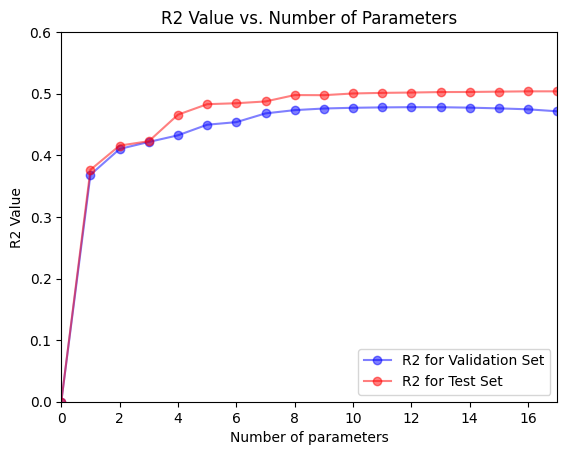

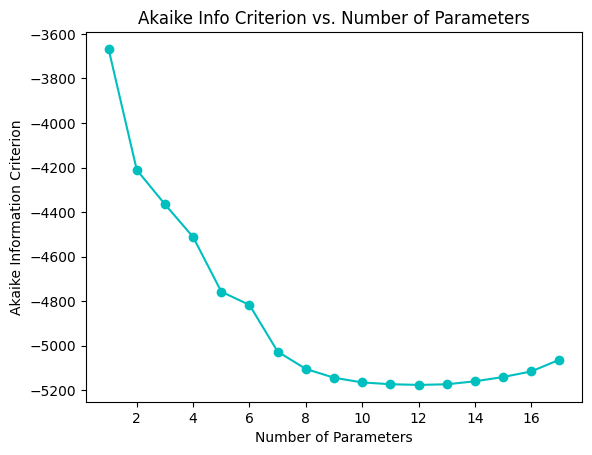


Optimal Model has 12 parameters
Optimal Model R2 Value on Training Set
0.47781890220668394

Optimal Model R2 Value on Test Set
0.5013833525614874


In [ ]:
from sklearn.model_selection import KFold
import math

# set number of parameters
final_num = 17

# creating variables storing r2 values and other things
max_indices = []
r2_values = []
r2_tests = []
losses = []
min_loss = 0
max_index = 0
max_r2 = 0
k = 5

# adding no parameter r2 values to r2 arrays
y_hat_zero = np.zeros((Y_train.shape[0], 1))
y_test_zero = np.zeros((Y_test.shape[0], 1))

r2_values.append(r2_score(Y_train, y_hat_zero))
r2_tests.append(r2_score(Y_test, y_test_zero))

# create a cross_validation method
def cross_validation(X_tr, Y_tr, X_te, Y_te, k):
  kf = KFold(n_splits = k, shuffle=True, random_state = 0)
  r2folds = [0] * k
  losses = [0] * k
  theta_final = np.zeros((X_tr.shape[1],1))

  # iterate through each fold
  for i, (iTrain, iTest) in (enumerate(kf.split(X_tr))):
    Xtr = X_tr[iTrain, :]
    Ytr = Y_tr[iTrain]
    Xte = X_tr[iTest, :]
    yte = Y_tr[iTest]
    theta = np.ones((X_tr.shape[1], 1))

    # optimize the theta
    theta_new = gradient_descent(Xtr, Ytr, theta, lr = 0.01, iters = 1000)
    y_hat = np.matmul(Xte, theta_new)

    # add r2 values to the r2folds array
    r2folds[i] = r2_score(yte, y_hat)
    theta_final += theta_new

    losses[i] = loss(Xte, yte, theta_new)

  # calculate r2 average
  r2avg = np.mean(r2folds)

  # find the avg of the theta values
  theta_final /= k

  # find the r2 score on the test set
  r2_test = r2_score(Y_te, np.matmul(X_te, theta_final))

  min_loss = sum(losses) / len(losses)

  return r2avg, r2_test, min_loss

# find the r2 score for the first parameter
max_r2_test = 0
for i in range(final_num):
  feature = ((X_train.T[i, :]).T).reshape([-1, 1])
  feature_test = ((X_test.T[i, :]).T).reshape([-1,1])
  r2, r2_test, loss_spec = cross_validation(feature, Y_train, feature_test, Y_test, 5)

  if (r2 > max_r2):
    max_r2 = r2
    max_index = i
    max_r2_test = r2_test
    min_loss = loss_spec
r2_values.append(max_r2)
max_indices.append(max_index)
r2_tests.append(max_r2_test)
losses.append(min_loss)

# iterate through the rest of the parameters
for i in range(final_num - 1):
  max_r2 = 0
  max_index = 0

  # determine which parameter results in highest r2 value
  for j in range(final_num):
    if j in max_indices:
      continue
    temp = max_indices.copy()
    temp.append(j)
    temp.sort()
    feature = ((X_train.T)[temp, :]).T
    feature_test = ((X_test.T)[temp, :]).T
    r2, r2_test, loss_spec = cross_validation(feature, Y_train, feature_test, Y_test, k)

    if (r2 > max_r2):
      max_r2 = r2
      max_index = j
      max_r2_test = r2_test
      min_loss = loss_spec

  # append all the maximized values to the arrays
  max_indices.append(max_index)
  r2_values.append(max_r2)
  r2_tests.append(max_r2_test)
  losses.append(min_loss)

# plot the r2 values for the validation set and the test set
plt.plot(range(0, final_num + 1, 1), r2_values, marker='o', color='b', alpha = 0.5)
plt.plot(range(0, final_num + 1, 1), r2_tests, marker='o', color='r', alpha = 0.5)
plt.legend(['R2 for Validation Set', 'R2 for Test Set'], loc='lower right')
plt.xlabel("Number of parameters")
plt.ylabel("R2 Value")
plt.title("R2 Value vs. Number of Parameters")
plt.xlim([0,17])
plt.ylim([0,0.6])
plt.show()

# calculate the akaike information criterion for all models
info_crit = []
for i in range(len(losses)):
  info_crit.append(2 * (i + 1) + len(X_train) * math.log(losses[i]))

# plot the number of parameters against the info criterion
plt.plot(range(1, final_num + 1, 1), info_crit, marker='o', color='c')
plt.xlabel("Number of Parameters")
plt.ylabel("Akaike Information Criterion")
plt.title("Akaike Info Criterion vs. Number of Parameters")
plt.show()

# determine the smallest info criterion value
index_min = min(range(len(info_crit)), key=info_crit.__getitem__)

print()

# print out descriptors of the model with the smallest info criterion
print("Optimal Model has {} parameters".format(index_min + 1))

print("Optimal Model R2 Value on Training Set")
print(r2_values[index_min])
print()
print("Optimal Model R2 Value on Test Set")
print(r2_tests[index_min])

**The model with the smallest Akaike Information Criterion is the model with 10 parameters. Thus, this model would be considered the most optimal.**

**Comparing this model's R2 values to the model in part b, their performances are very similar. This model's R2 values are 0.477 for the training set and 0.500 for the test set, while the part b model's R2 values are 0.486 and 0.503, respectively.**


**(d)** Using scikit-learn, explore the use of a non-linear regressor other than a neural network (like random-forest-- we will spend more time on neural networks later) for predicting solubility. Explain how this model works and what the parameters are. What are the hyperparameters associated with this model and what do they control? Explore the effects of changing these hyperparameters on the predictive performance of your model.
Use grid-search and cross-validation to identify an optimal set of *hyperparameters*.
Examine how your results change using *(i)* the full set of features and *(ii)}* the set of features identified in part **c**.

***Note:*** Grid search with cross-validation exhaustively evaluates all hyperparameter combinations, which may take several minutes to complete depending on the grid size (i.e., number of hyperparameters and their options).

---

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# implement random forest regressor
randomforest = RandomForestRegressor(criterion='squared_error',random_state = 0)

# create hyperparameters dictionary for cross validation
hyperparameters = {'max_depth': [x for x in range(10, 21, 10)],
                   'n_estimators':[x for x in range(10, 30, 10)],
                   'min_samples_leaf': [x for x in range(1, 4, 1)]}

# run cross validation
clf = GridSearchCV(randomforest, param_grid = hyperparameters, cv=5, scoring='r2')
clf.fit(X_train, np.ravel(Y_train))

# find best parameters and print them out
best_param = clf.best_params_
print("Best Parameters")
print(best_param)
print()

# find the R2 score for the best parameters and print them out
optimized_randomforest = RandomForestRegressor(**best_param, random_state = 0)
optimized_randomforest.fit(X_train, np.ravel(Y_train))
y_pred = optimized_randomforest.predict(X_test)
r2 = r2_score(np.ravel(Y_test), np.ravel(y_pred))
print("R2 Score from Random Forest Regressor")
print(r2)

Best Parameters
{'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 20}
R2 Score from Random Forest Regressor
0.7671769020293685


**For this model, I used the random forest regressor model. The way this model works is by creating an n number of decision trees, and then runs a bootstrapped version of the data set agaisnt each decision tree. Then, by averaging the outputs of all of the decision trees, we get a final output. The parameters in the model would be the way the decision trees split their respective datasets.**

**Some hyperparameters of this model are the n_estimaters, max_depth, and min_samples_leaf. n_estimators is the number of decision trees in the random forest. max_depth is how deep the trees can go. min_samples_leaf means the minimum number of samples in each leaf node.**



---

## **Problem 3. High classification. (35 points):**

Examine the contents of `solubility_classification.csv`.
You can download and view it on your own or easily examine the contents on [github](https://github.com/webbtheosim/CBE512-MLinChmSciEng/blob/main/data/solubility-classification-cbe512.csv). This is the same dataset as in **Problem 2** except we have removed `Solubility` as a label and included `Group`. For this problem part, your *label* that we want to predict is the class featured in `Group`


---



**(a)** Use multivariate [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to predict the solubility `Group` of a molecule from the numerical features in the dataset. Follow the same principles as in **Problem 2a**.

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# read the file and put all of the data into a pandas dataframe
url = "https://raw.githubusercontent.com/webbtheosim/CBE512-MLinChmSciEng/refs/heads/main/data/solubility-classification-cbe512.csv"
data = pd.read_csv(url)

LogisticModel = LogisticRegression(random_state = 0, max_iter = 1000)

labels = np.array(data['Group'])

# collect all of the numerical features as input
num_data = []
for i in range(0, len(np.array(data).T)):
  if (isinstance(np.array(data).T[i][0], int) or isinstance(np.array(data).T[i][0], float)):
    num_data.append(np.array(data).T[i])

# store the data in a np.array num_data, with each row being one data point
# and each column being one feature
num_data = np.array(num_data).T

# standard scaler creation
scaler = StandardScaler()

# scale the data
X_train, X_test, Y_train, Y_test = data_split(num_data, labels)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the logistic model and predict y values
LogisticModel.fit(X_train, Y_train)
y_pred = LogisticModel.predict(X_train)
y_pred_test = LogisticModel.predict(X_test)

# test accuracy on training set and test set
accuracy = 0
accuracy_test = 0
for i in range(len(Y_train)):
  if (y_pred[i] == Y_train[i]):
    accuracy += 1
for i in range(len(Y_test)):
  if (y_pred_test[i] == Y_test[i]):
    accuracy_test += 1

# print out the accuracies
print("Accuracy on Training Set")
first_acc_train = accuracy / len(Y_train)
print(first_acc_train)
print()
print("Accuracy on Test Set")
first_acc_test = accuracy_test / len(Y_test)
print(first_acc_test)

Accuracy on Training Set
0.7790857858484659

Accuracy on Test Set
0.7641462193289935


**(b)** Again some of these features might not be useful or may be redundant for the model. In this part, use cross-validation to perform feature selection based on a crierion that you describe. Rather than performing a greedy method, this time, you will adopt a stochastic strategy where you randomly choose a set of features (from all possible combinations) and assess the performance of the resulting model. You should conduct as many random trials as model evaluations run for the greedy-selection algorithm from **Problem 2**. Identify the best-performing model and compare its performance to the model from part **a**.

---

In [ ]:
import random
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# define some variables
num_of_features = 17
k = 5
best_features = []
best_acc = 0

# for the same number of times as part a, randomly choose features and train model
for i in range(17 * 8):
  rand_int = np.random.RandomState(i).randint(1, 18)
  features = np.random.RandomState(i).choice(np.arange(0,17), size = rand_int, replace=False)
  LogisticModel = LogisticRegression(random_state = i, max_iter = 1000)
  X_train_rand = (X_train.T[features]).T
  X_test_rand = (X_test.T[features]).T
  LogisticModel.fit(X_train_rand, Y_train)
  avg_acc = sum(cross_val_score(LogisticModel, X_train_rand, Y_train, cv = k, scoring = 'accuracy')) / k
  if (avg_acc >= best_acc):
    best_acc = avg_acc
    best_features = features

# pick best model and test it
LogisticModel = LogisticRegression(random_state = 0, max_iter = 1000)
optimal_X_train = (X_train.T[best_features]).T
LogisticModel.fit(optimal_X_train, Y_train)
optimal_X_test = (X_test.T[best_features]).T
y_pred = LogisticModel.predict(optimal_X_test)

# calculate accuracy
sec_acc = 0
for i in range(len(y_pred)):
  if (y_pred[i] == Y_test[i]):
    sec_acc += 1

# print accuracy and best features
sec_acc /= len(y_pred)
print("Accuracy on Test Set")
print(sec_acc)

print()
print("Best Features")
print(np.sort(best_features))

Accuracy on Test Set
0.7646469704556835

Best Features
[ 0  2  3  4  5  8  9 10 12 13 14 15]


**Comparing this stochastic-method generated model to the model from part (a), this model's accuracy is barely better than the part (a) model. In particular, the model from part (a) has a test set accuracy of 0.76415, whereas this model has a test set accuracy of 0.76465.**

**(c)** Here we will compare the effects of $\ell_1$ vs $\ell_2$ vs. no regularization on logistic regression. Construct a graphic that summarizes the (relative) performances of these three classifiers for different strengths of the regularization. Specifically, show this for weighting coefficients of [1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]. Put error bars on these performances

*Hint:* use cross-validation to get separate performance evaluations.

---

Accuracies
[0.7621441102756892, 0.7789605510331872, 0.7789605510331872, 0.7789605510331872, 0.7789605510331872, 0.7790857858484659, 0.7792110206637445, 0.7790857858484659, 0.7790857858484659, 0.77871008140263, 0.77871008140263, 0.77871008140263, 0.77871008140263, 0.77871008140263, 0.77871008140263]

Models
['None', 'l1, 1.0e-3', 'l2, 1.0e-3', 'l1, 1.0e-2', 'l2, 1.0e-2', 'l1, 1.0e-1', 'l2, 1.0e-1', 'l1, 1.0e0', 'l2, 1.0e0', 'l1, 1.0e1', 'l2, 1.0e1', 'l1, 1.0e2', 'l2, 1.0e2', 'l1, 1.0e3', 'l2, 1.0e3']

Error bars
[0.0006317390496043908, 0.0, 0.0, 0.0, 0.0, 2.979914201997254e-07, 3.293589381154815e-07, 2.4152988795130862e-06, 2.4152988795130862e-06, 1.976153628692528e-06, 1.976153628692528e-06, 1.976153628692528e-06, 1.976153628692528e-06, 1.976153628692528e-06, 1.976153628692528e-06]




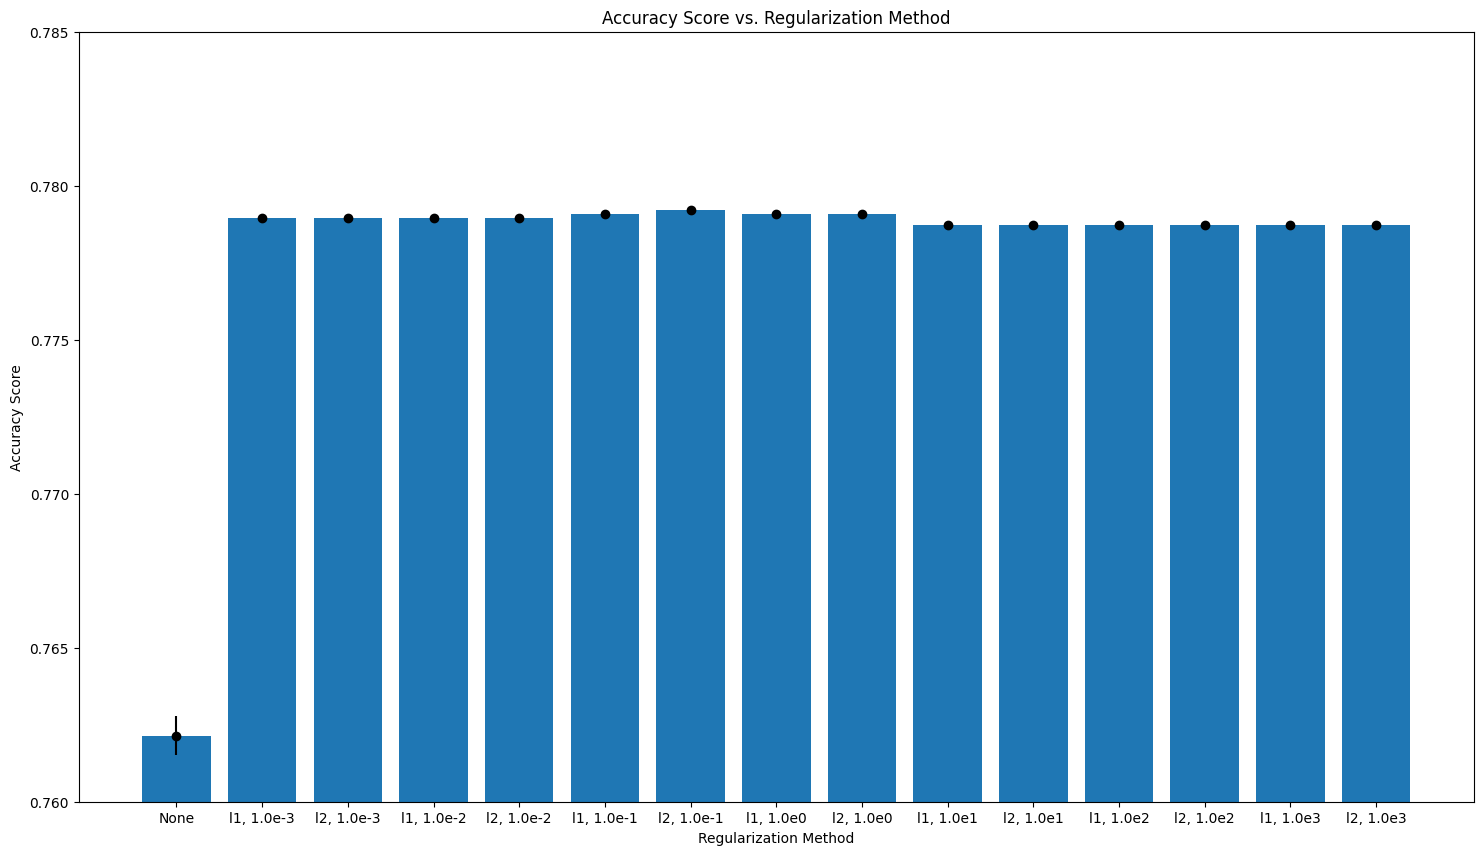

In [ ]:
import random
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# define a bunch of arrays
accs = []
models = []
stderr = []

# create model
LogisticModel = LogisticRegression(random_state = 0, max_iter = 1000)
LogisticModel.fit(X_train, Y_train)

# determine accuracy with no regularization
first_accs = np.array(cross_val_score(LogisticModel, X_test, Y_test, cv = 5))

# add accuracy and standard error and model
accs.append(np.sum(first_accs) / 5)
stderr.append(np.std(first_accs) / np.sqrt(np.size(first_accs)))
models.append("None")

# set hyperparameters for the penalties and weights
hyperparameters = {'penalty': ['l1', 'l2'], 'C': [1.0e-03, 1.0e-02, 1.0e-01, 1.0e+00, 1.0e+01, 1.0e+02, 1.0e+03]}

# cross validate the model
LogisticModel = LogisticRegression(random_state = 0, max_iter = 500, solver='liblinear')
clf = GridSearchCV(LogisticModel, param_grid = hyperparameters, scoring='accuracy', cv = 5)
clf.fit(X_train, Y_train)

# add all test accuracies and average them
accurs = clf.cv_results_['split0_test_score']
accurs += clf.cv_results_['split1_test_score']
accurs += clf.cv_results_['split2_test_score']
accurs += clf.cv_results_['split3_test_score']
accurs += clf.cv_results_['split4_test_score']
accurs /= 5
accs.extend(accurs)

# calculate the the standard errors
stderror = (clf.cv_results_['split0_test_score'] - accurs)**2

for i in range(1, 5):
  stderror += (clf.cv_results_['split{}_test_score'.format(i)] - accurs)**2
stderr.extend(stderror)

# add all the model names
for i in range(-3, 4):
  for j in range(0, 2):
    string = ''
    if (j == 0):
      string += 'l1'
    else:
      string += 'l2'
    string += ', 1.0e{}'.format(i)
    models.append(string)

# print out accuracies, models, and error bars
print("Accuracies")
print(accs)
print()
print("Models")
print(models)
print()
print("Error bars")
print(stderr)
print()
print()

# plot all results
plt.figure(figsize=(18,10))
plt.bar(models, accs)
plt.errorbar(models, accs, color='black', fmt='o', yerr = stderr)
plt.ylim(0.76, 0.785)
plt.xlabel("Regularization Method")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score vs. Regularization Method")
plt.show()

**(d)** Implement a *non-linear* support vector machine classifier from `scikit-learn` to predict the solubility group. Explain roughly how this model works. What are the hyperparameters associated with this model and what do they control? Explore the effects of changing these hyperparameters on the predictive performance of your model and how well your training data fits your data. Try to identify an optimal set of hyperparameters using cross validation. How does this predictive performance of this model compare to those you constructed in previous parts?

---

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# create svc model
svc = SVC(random_state = 0)
hyperparameters = {'kernel': ['rbf', 'poly', 'sigmoid'],
                   'C': [0.1, 1, 10]}

# gridsearch the hyperparameters
clf = GridSearchCV(svc, param_grid = hyperparameters, cv=5, scoring='accuracy')
clf.fit(X_train, Y_train)

# find best parameters
best_param = clf.best_params_
print("Best Parameters")
print(best_param)

# test the optimized svc model
optimized_svc = SVC(**best_param, random_state = 0)
optimized_svc.fit(X_train, Y_train)
y_pred = optimized_svc.predict(X_test)

# determine accuracy
acc = 0
for i in range(len(y_pred)):
  if y_pred[i] == Y_test[i]:
    acc += 1
acc /= len(y_pred)

# print accuracy
print("Accuracy from Non Linear Support Vector Classifier")
print(acc)

Best Parameters
{'C': 0.1, 'kernel': 'poly'}
Accuracy from Non Linear Support Vector Classifier
0.7641462193289935


**The way the nonlinear support vector machine classifier is it tries to map data on to a different dimensional space. Through doing this, the support vector machine can attempt to draw a hyperplane that can maximally separate the different classes, even if the data are not linearly separable.**

**Some hyperparameters that can be controlled are the kernel function and the C value (which characterizes the weight of l2 regularization).**

**Comparing this accuracy to other parts, the accuracy of this non-linear support vector machine classifier has a slightly worse accuracy than the model from part b, which purely used cross-validation and logistic regression. Also, in comparison to the models with regularization from part c, this non-linear support vector machine classifier does not perform as well.**